In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
brack = gpd.read_file('../data/bike_racks(GIS).geojson')

In [3]:
print(brack.crs)

epsg:4326


In [4]:
brack.head(10)

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)
5,Shelby Bottoms Park & Greenway,1,Park/Greenway,Public,116,6,Existing,-86.7247647834,Rack,Health Dept,36.1665911938,5,POINT (-86.72476 36.16659)
6,Shelby Bottoms Park & Greenway,8,Park/Greenway,Public,117,7,Existing,-86.723953674,Rack,Health Dept,36.1669023034,16,POINT (-86.72395 36.16690)
7,Shelby Bottoms Park & Greenway,1,Park/Greenway,Public,118,8,Existing,-86.7247342306,Rack,Health Dept,36.1657661936,5,POINT (-86.72473 36.16577)
8,Metro Public Works,0,Metro Office,Public,257,9,Proposed,-86.760244445,Rack,Health Dept,36.1639388889,0,POINT (-86.76024 36.16394)
9,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",0,Bus Stop,Public,83,10,Future Artistic,-86.7799546267,Rack,Health Dept,36.1633719897,0,POINT (-86.77995 36.16337)


In [5]:
nashpmap = gpd.read_file('../data/metro_parks_boundaries(GIS).geojson')

In [6]:
print(nashpmap.crs)

epsg:4326


In [7]:
nashpmap.head(10)

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."
5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation...","MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ..."
6,8.53,H. G. Hill Park,2012,H. G. Hill,PARK,6710 Charlotte Pike,-86.88757407,36.13619596,"H.G. Hill Park is a small, friendly park with ...","MULTIPOLYGON (((-86.88729 36.13620, -86.88735 ..."
7,1991.56,Percy Warner Park,1926,Percy Warner,PARK,7311 Hwy100,-86.88419854,36.06729215,Percy Warner Park is 2684 acres of forest and ...,"MULTIPOLYGON (((-86.87147 36.07105, -86.87149 ..."
8,25.24,Charlotte Park,1964,Charlotte,PARK,6031 Deal Ave,-86.87070668,36.15454327,"A nice, family oriented park.","MULTIPOLYGON (((-86.86852 36.15547, -86.86854 ..."
9,18.38,Joelton Park,1989,Joelton,PARK,21 Joelton Community Center Rd,-86.87022094,36.31718158,Joelton Park is a multi-recreational park with...,"MULTIPOLYGON (((-86.86987 36.31832, -86.86921 ..."


In [8]:
nashpmap.shape

(287, 10)

<AxesSubplot:>

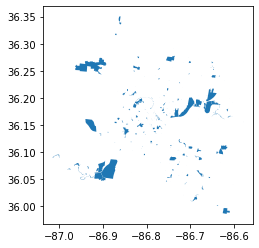

In [9]:
nashpmap.plot()

In [10]:
zipcodes = gpd.read_file('../data/onlyzipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( 10)

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


In [11]:
zipcodes.shape

(57, 6)

<AxesSubplot:>

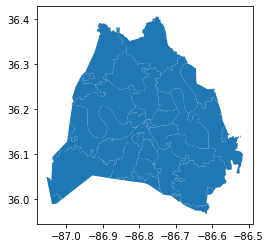

In [12]:
zipcodes.plot()

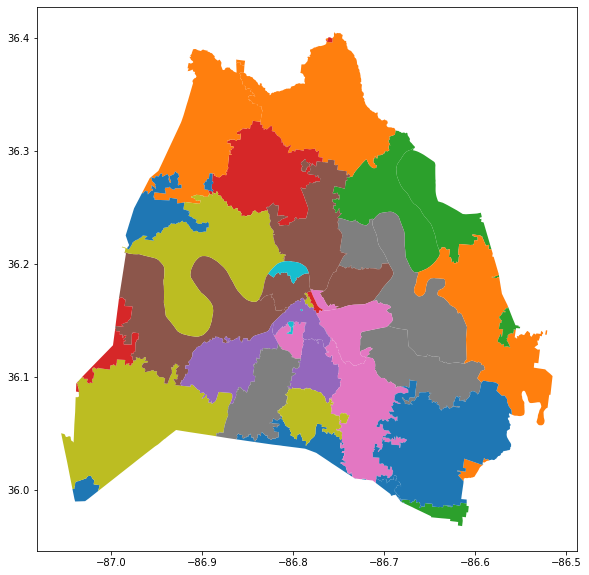

In [13]:
zipcodes.plot(column = 'zip', figsize = (10,10));

In [14]:
brack.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   detail_loc  430 non-null    object  
 1   quantity    430 non-null    object  
 2   location    430 non-null    object  
 3   domain      430 non-null    object  
 4   idnumber    430 non-null    object  
 5   objectid    430 non-null    object  
 6   status      430 non-null    object  
 7   lon         426 non-null    object  
 8   type        430 non-null    object  
 9   data_colle  430 non-null    object  
 10  lat         426 non-null    object  
 11  capacity    430 non-null    object  
 12  geometry    430 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 43.8+ KB


In [15]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
brack_geo = gpd.GeoDataFrame(brack,
                            crs = zipcodes.crs,
                            geometry = brack['geometry'])

In [17]:
type(brack_geo)

geopandas.geodataframe.GeoDataFrame

In [18]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [19]:
brack_by_zip = gpd.sjoin(brack,zipcodes, op = 'within')

In [20]:
brack_by_zip.head(10)

,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry,index_right,zip,po_name
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993),50,37013,ANTIOCH
140,Cole Elementary School,1,Elementary School,Public,174,141,Existing,-86.6982749997,Rack,Health Dept,36.0590833331,20,POINT (-86.69827 36.05908),50,37013,ANTIOCH
141,Antioch Middle School,0,Middle School,Public,331,142,Proposed,-86.6721262461,Rack,Health Dept,36.055141113,0,POINT (-86.67213 36.05514),50,37013,ANTIOCH
142,J E Moss Elementary School,2,Elementary School,Public,175,143,Existing,-86.6693833338,Rack,Health Dept,36.0672500001,52,POINT (-86.66938 36.06725),50,37013,ANTIOCH
143,Apollo Middle School,2,Middle School,Public,176,144,Existing,-86.6642388884,Rack,Health Dept,36.0670777782,56,POINT (-86.66424 36.06708),50,37013,ANTIOCH
146,Antioch High School,0,High School,Public,333,147,Proposed,-86.599427778,Rack,Health Dept,36.0467638885,0,POINT (-86.59943 36.04676),50,37013,ANTIOCH
147,JF Kennedy Middle School,1,Middle School,Public,178,148,Existing,-86.6012111109,Rack,Health Dept,36.0557416665,11,POINT (-86.60121 36.05574),50,37013,ANTIOCH
151,Henry C. Maxwell Elementary School,0,Elementary School,Public,337,152,Proposed,-86.6739777781,Rack,Health Dept,36.0310083332,0,POINT (-86.67398 36.03101),50,37013,ANTIOCH
159,William A. Pitts Park,0,Park,Public,341,160,Proposed,-86.7066578142,Rack,Health Dept,36.0593304324,0,POINT (-86.70666 36.05933),50,37013,ANTIOCH
160,Southeast Branch Library,1,Library,Public,183,161,Existing,-86.641258333,Rack,Health Dept,36.060538889,3,POINT (-86.64126 36.06054),50,37013,ANTIOCH


In [21]:
brack_by_zip.shape

(426, 16)

In [22]:
brack_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37221    10
37218    10
37228     8
37217     8
37205     7
37212     7
37213     5
37204     4
37138     3
37220     3
37215     3
37189     2
37072     1
37080     1
Name: zip, dtype: int64

In [23]:
brack37203 = brack_by_zip.loc[brack_by_zip['zip'] == '37203']
brack37203.shape

(51, 16)

In [24]:
zipcode37203 = zipcodes.loc[zipcodes['zip'] == '37203']

In [25]:
zipcode37203.shape

(1, 3)

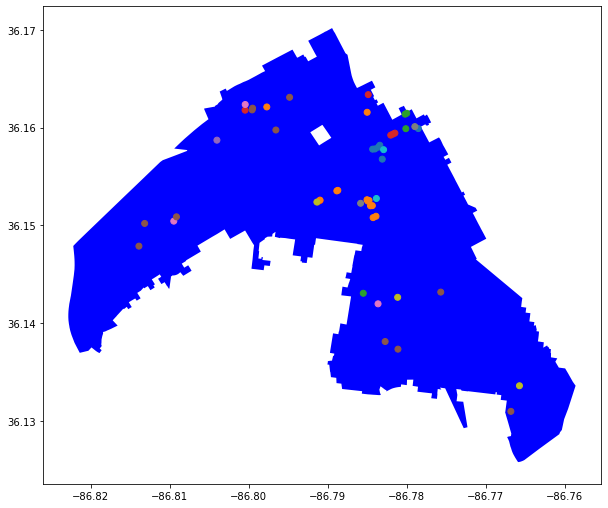

In [26]:
ax = zipcode37203.plot(figsize = (10,12), color = 'blue')
brack37203.plot( ax = ax, column = 'location');
plt.show();

In [27]:
zipcode37203.geometry.centroid

<ipython-input-27-b0c82a5b95d2>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcode37203.geometry.centroid


55    POINT (-86.78898 36.14857)
dtype: geometry

In [28]:
center = zipcode37203.geometry.centroid[55]
print(center)

POINT (-86.7889841001608 36.14857447556778)


<ipython-input-28-0652bab5af31>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcode37203.geometry.centroid[55]


In [29]:
area_center = [center.y, center.x]
print(area_center)

[36.148574475567784, -86.7889841001608]


In [30]:
zipcode37203 = folium.Map(location = area_center, zoom_start = 12)
zipcode37203

In [45]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(brack37203).add_to(map_37203)

#iterate through brack37203 to create locations and markers 
#for each bike rack
#remember for Folium locations, lat is listed first!!

for row_index, row_values in brack37203.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc']), row_values['capacity'], row_values['status']
    icon=folium.Icon(color="blue",icon="fa-bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37203.html')

#display our map
map_37203

In [32]:
brack37214 = brack_by_zip.loc[brack_by_zip['zip'] == '37214']
brack37214.shape

(15, 16)

In [33]:
zipcode37214 = zipcodes.loc[zipcodes['zip'] == '37214']

In [34]:
zipcode37214.shape

(1, 3)

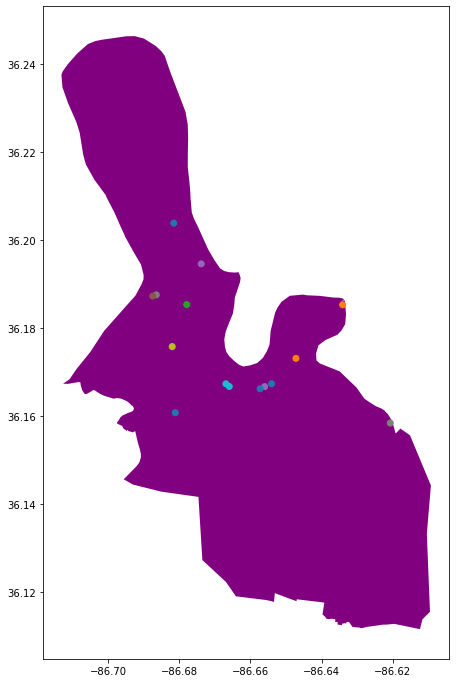

In [35]:
ax = zipcode37214.plot(figsize = (10,12), color = 'purple')
brack37214.plot( ax = ax, column = 'location');
plt.show();

In [36]:
zipcode37214.geometry.centroid

<ipython-input-36-894d47a26593>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcode37214.geometry.centroid


36    POINT (-86.66271 36.16744)
dtype: geometry

In [38]:
center = zipcode37214.geometry.centroid[36]
print(center)

POINT (-86.66271483913449 36.16743875185725)


<ipython-input-38-764b9aaa7bd5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcode37214.geometry.centroid[36]


In [39]:
area_center = [center.y, center.x]
print(area_center)

[36.167438751857254, -86.6627148391345]


In [40]:
zipcode37214 = folium.Map(location = area_center, zoom_start = 12)
zipcode37214

In [46]:
map_37214 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(brack37214).add_to(map_37214)

#iterate through brack37203 to create locations and markers 
#for each bike rack
#remember for Folium locations, lat is listed first!!

for row_index, row_values in brack37214.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str(row_values['detail_loc']), row_values['capacity'], row_values['status']
    icon=folium.Icon(color="purple",icon="fa-bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37214)
map_37214.save('../maps/map37214.html')

#display our map
map_37214